In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.load('../data/electron-photon-large.npz', allow_pickle=True)

In [3]:
data.keys()

KeysView(NpzFile '../data/electron-photon-large.npz' with keys: x_train, y_train, x_test, y_test)

In [4]:
x_train = data["x_train"]
y_train = data["y_train"]
x_test = data["x_test"]
y_test = data["y_test"]

In [5]:
x_train.shape

(398400, 32, 32, 2)

### for 1 image in x_train

In [25]:
image_1 = x_train[0][...,0]
image_1.shape

(32, 32)

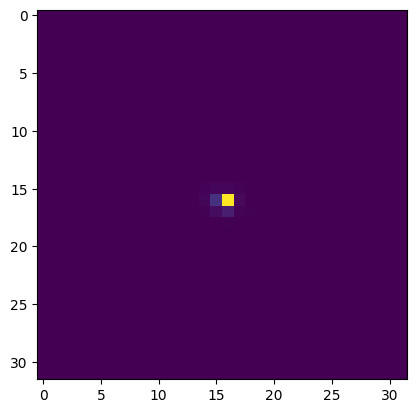

In [26]:
plt.imshow(image_1)

In [27]:
def normalize(image):
    """Normalize the image to the range [0, 1] using min-max scaling."""
    min_val = np.min(image)
    max_val = np.max(image)
    norm_image = (image - min_val) / (max_val - min_val)
    return norm_image

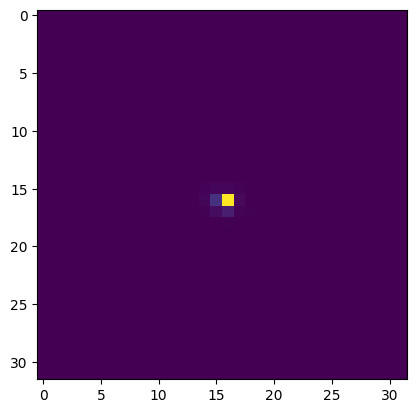

In [29]:
norm_image = normalize(image_1)
norm_image.shape
plt.imshow(norm_image)

In [30]:
def standardize(image):
    """Standardize the image to have a mean of 0 and a standard deviation of 1."""
    mean = np.mean(image)
    std = np.std(image)
    standardized_image = (image - mean) / std
    return standardized_image

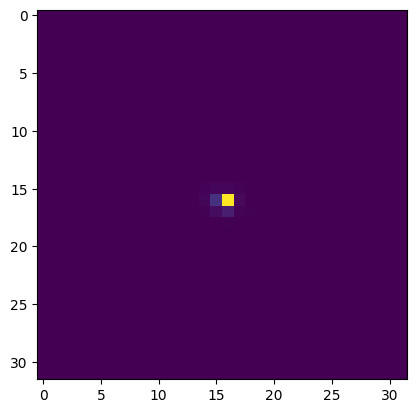

In [31]:
standardized_image = standardize(norm_image)
plt.imshow(standardized_image)

In [32]:
def block_average(image, block_size):
    # Ensure the image can be divided into an integer number of blocks
    h, w = image.shape
    new_h, new_w = h // block_size, w // block_size
    image = image[:new_h * block_size, :new_w * block_size]
    reshaped = image.reshape(new_h, block_size, new_w, block_size)
    block_averaged = reshaped.mean(axis=(1, 3))
    return block_averaged

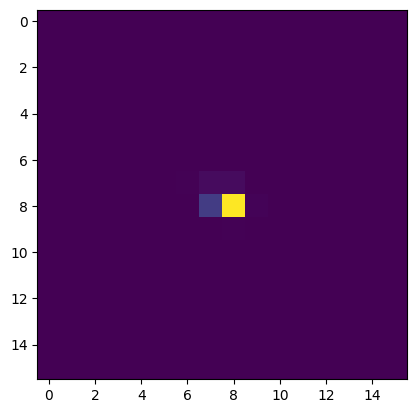

In [33]:
downsampled_image = block_average(standardized_image, 2)
plt.imshow(downsampled_image)

In [12]:
# Usin PCA to find out the most relevant number of pixels after flattening the image
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def select_n_components_variance_ratio(images, target_variance=0.90):
    # Flatten the images
    flattened_images = images.reshape(images.shape[0], -1)
    print(flattened_images.shape)
    # Apply PCA
    pca = PCA()
    pca.fit(flattened_images)
    # Calculate cumulative explained variance ratio
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    # Find the number of components to retain
    n_components = np.argmax(cumulative_variance_ratio >= target_variance) + 1
    # Plot cumulative explained variance ratio
    plt.figure()
    plt.plot(cumulative_variance_ratio, marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance Ratio')
    plt.grid(True)
    plt.show()
    return n_components

(32, 32)


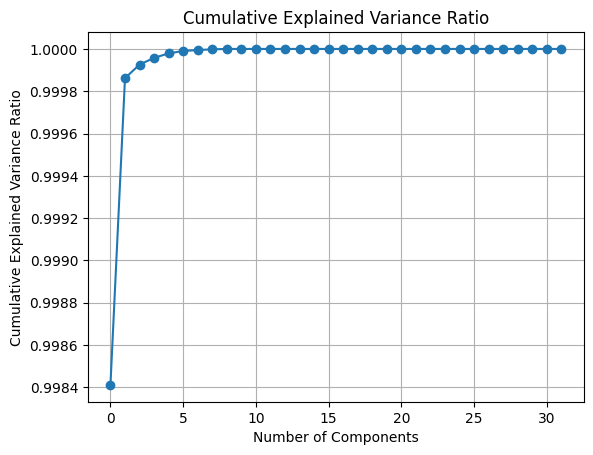

Number of components to retain: 1


In [22]:
c1 = x_train[..., 0]
c1.shape
c1[:10].shape
n_components_1 = select_n_components_variance_ratio(c1[1])
print("Number of components to retain:", n_components_1)

In [ ]:
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# def apply_pca_separately(image_data, n_components):
#     """
#     Apply PCA separately to each channel of an image dataset.

#     Parameters:
#     image_data (numpy.ndarray): Image dataset of shape (n, 32, 32, 2)
#     n_components (int): Number of principal components to keep for each channel

#     Returns:
#     numpy.ndarray: Transformed data of shape (n, n_components * 2)
#     """
#     n_samples = image_data.shape[0]
    
#     # Separate the channels
#     channel_1 = image_data[..., 0]
#     channel_2 = image_data[..., 1]
    
#     # Reshape each channel to (n, 1024)
#     reshaped_channel_1 = channel_1.reshape(n_samples, -1)  # (n, 1024)
#     reshaped_channel_2 = channel_2.reshape(n_samples, -1)  # (n, 1024)
    
#     # Standardize each channel
#     scaler_1 = StandardScaler()
#     standardized_channel_1 = scaler_1.fit_transform(reshaped_channel_1)
    
#     scaler_2 = StandardScaler()
#     standardized_channel_2 = scaler_2.fit_transform(reshaped_channel_2)
    
#     # Apply PCA to each channel
#     pca_1 = PCA(n_components=n_components)
#     pca_result_1 = pca_1.fit_transform(standardized_channel_1)
    
#     pca_2 = PCA(n_components=n_components)
#     pca_result_2 = pca_2.fit_transform(standardized_channel_2)
    
#     # Concatenate the results
#     pca_combined = np.concatenate((pca_result_1, pca_result_2), axis=1)
    
#     return pca_combined

# # Example usage
# # Assuming image_data is your dataset with shape (n, 32, 32, 2)
# # n_components is the number of principal components you want to keep for each channel
# # pca_transformed_data = apply_pca_separately(image_data, n_components=10)


In [25]:
# import numpy as np

# def crop_image_based_on_zeros(image, num_zeros=3):
#     """
#     Crop the image based on encountering 4 consecutive zeros on each side.

#     Parameters:
#     image (numpy.ndarray): The input image array.
#     num_zeros (int): Number of consecutive zeros to check for cropping (default is 4).

#     Returns:
#     numpy.ndarray: The cropped image.
#     """
#     # Check for consecutive zeros in rows
#     rows_to_crop_top = 0
#     for i in range(image.shape[0]):
#         if np.all(image[i, :] == 0):
#             rows_to_crop_top += 1
#             if rows_to_crop_top == num_zeros:
#                 break
#         else:
#             rows_to_crop_top = 0
    
#     rows_to_crop_bottom = 0
#     for i in range(image.shape[0] - 1, -1, -1):
#         if np.all(image[i, :] == 0):
#             rows_to_crop_bottom += 1
#             if rows_to_crop_bottom == num_zeros:
#                 break
#         else:
#             rows_to_crop_bottom = 0
    
#     # Check for consecutive zeros in columns
#     cols_to_crop_left = 0
#     for i in range(image.shape[1]):
#         if np.all(image[:, i] == 0):
#             cols_to_crop_left += 1
#             if cols_to_crop_left == num_zeros:
#                 break
#         else:
#             cols_to_crop_left = 0
    
#     cols_to_crop_right = 0
#     for i in range(image.shape[1] - 1, -1, -1):
#         if np.all(image[:, i] == 0):
#             cols_to_crop_right += 1
#             if cols_to_crop_right == num_zeros:
#                 break
#         else:
#             cols_to_crop_right = 0
    
#     # Calculate the crop boundaries
#     top_boundary = rows_to_crop_top - num_zeros if rows_to_crop_top >= num_zeros else 0
#     bottom_boundary = image.shape[0] - (rows_to_crop_bottom - num_zeros) if rows_to_crop_bottom >= num_zeros else image.shape[0]
#     left_boundary = cols_to_crop_left - num_zeros if cols_to_crop_left >= num_zeros else 0
#     right_boundary = image.shape[1] - (cols_to_crop_right - num_zeros) if cols_to_crop_right >= num_zeros else image.shape[1]
    
#     # Crop the image
#     cropped_image = image[top_boundary:bottom_boundary, left_boundary:right_boundary]
    
#     return cropped_image

### pca

In [18]:
image_raw = x_train[:1][...,0]
print(image_raw.shape)

(1, 32, 32)


In [19]:
image_bw = image_raw/image_raw.max()
print(image_bw.max())

1.0


(1, 1024)


C:\Users\Sanya Nanda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_pca.py:557: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


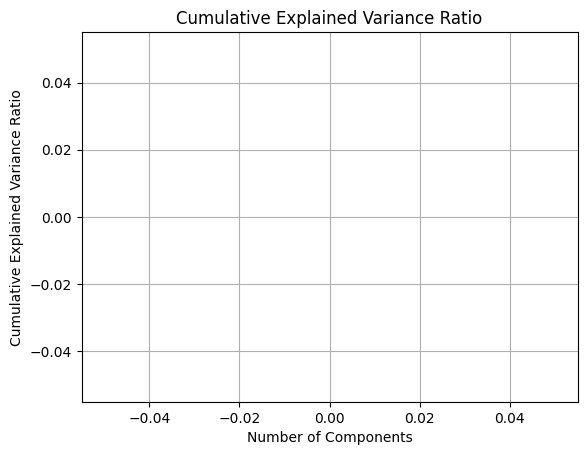

In [24]:
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA

pca = PCA()
flattened_images = image_bw.reshape(image_bw.shape[0], -1)
print(flattened_images.shape)
pca.fit(flattened_images)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
# Find the number of components to retain
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
# Plot cumulative explained variance ratio
plt.figure()
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [8]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.fit_transform(image_bw)

In [9]:
image_recon.shape

(32, 3)

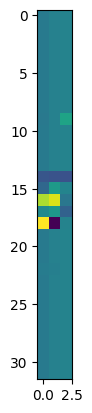

In [10]:
plt.imshow(image_recon)